# 1. Initial Setup & Data Overview

In [1]:
import numpy as np 
import pandas as pd 
from pandas_summary import DataFrameSummary

import seaborn as sns 
import matplotlib.pyplot as plt
from  scipy.stats import chi2_contingency, f_oneway
from math import log, e

import warnings
import random

pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)
%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r'C:\Users\admin\Desktop\PYTHON LEARNING\Data_Projects_01\CUSTOMER CHURN PREDICTION\Dataset\Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.columns.tolist()

['RowNumber',
 'CustomerId',
 'Surname',
 'CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [4]:
df.drop(columns=['RowNumber','CustomerId','Surname'],axis = 1 , inplace = True)

In [5]:
df.shape

(10000, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [7]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

# 2. Univariate Analysis

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [9]:
numeric_df0 = df.select_dtypes(include='number')
dfs = DataFrameSummary(numeric_df0)
dfs.columns_stats.T

,counts,uniques,missing,missing_perc,types
CreditScore,10000,460,0,0%,numeric
Age,10000,70,0,0%,numeric
Tenure,10000,11,0,0%,numeric
Balance,10000,6382,0,0%,numeric
NumOfProducts,10000,4,0,0%,numeric
HasCrCard,10000,2,0,0%,bool
IsActiveMember,10000,2,0,0%,bool
EstimatedSalary,10000,9999,0,0%,numeric
Exited,10000,2,0,0%,bool


In [10]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
df.duplicated().sum()

0

## Target Variable Exploration

In [12]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [13]:
sns.set_theme(
 style="whitegrid",
 palette="pastel",
 context="notebook"
)

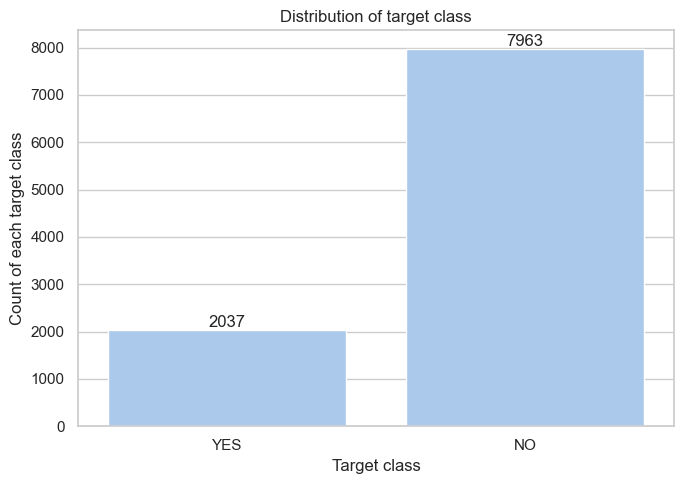

In [14]:
plt.figure(figsize = (7,5))
ax = sns.countplot(data = df,x = df['Exited'].map({1:'YES',0:'NO'}))
ax.bar_label(ax.containers[0])
plt.xlabel('Target class')
plt.ylabel('Count of each target class')
plt.title('Distribution of target class')
plt.tight_layout()
plt.show()

In [15]:
from scipy.stats import entropy
ent = pd.value_counts(df['Exited'], normalize=True)
entropy(ent)

0.505489127326179

Entropy of the target variable is 0.505, which indicates a moderate level of impurity or uncertainty in the class distribution. This means the classes are not perfectly balanced or perfectly pure — there is some mix, but one class likely dominates slightly.

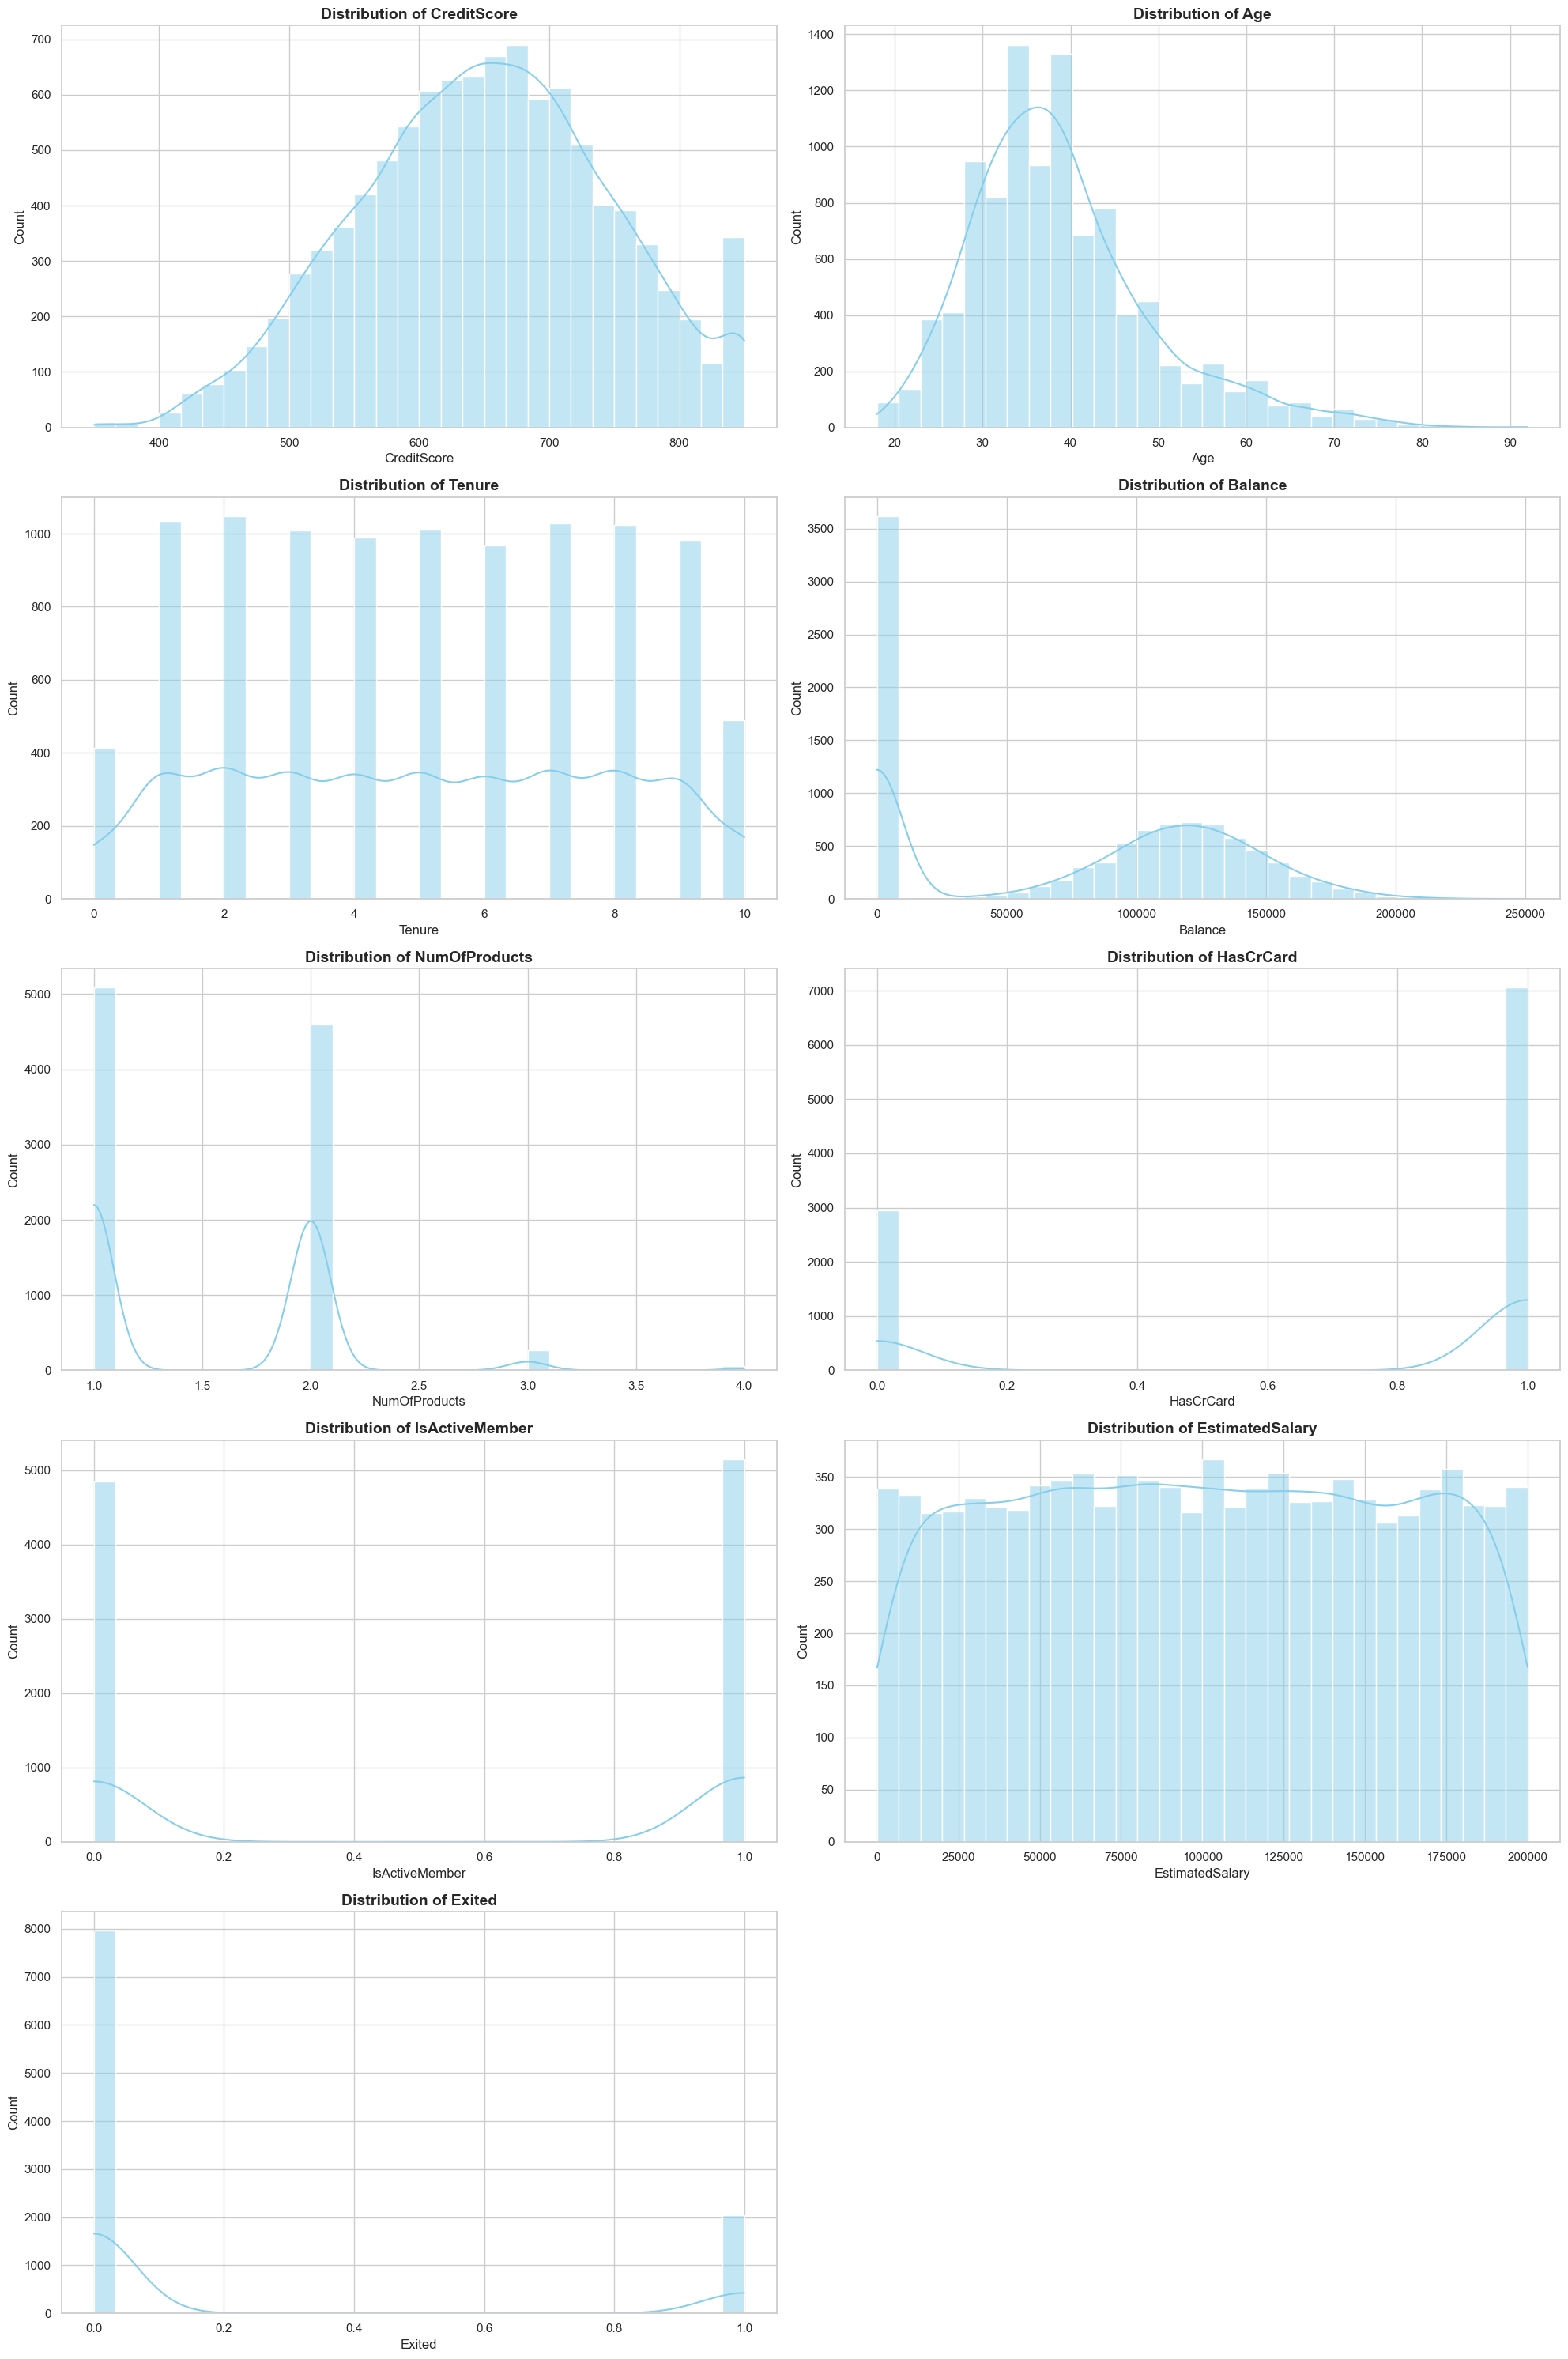

In [16]:
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(20, 30))
for i, col in enumerate(numeric_df.columns):
    plt.subplot(5, 2, i+1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f"Distribution of {col}",fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

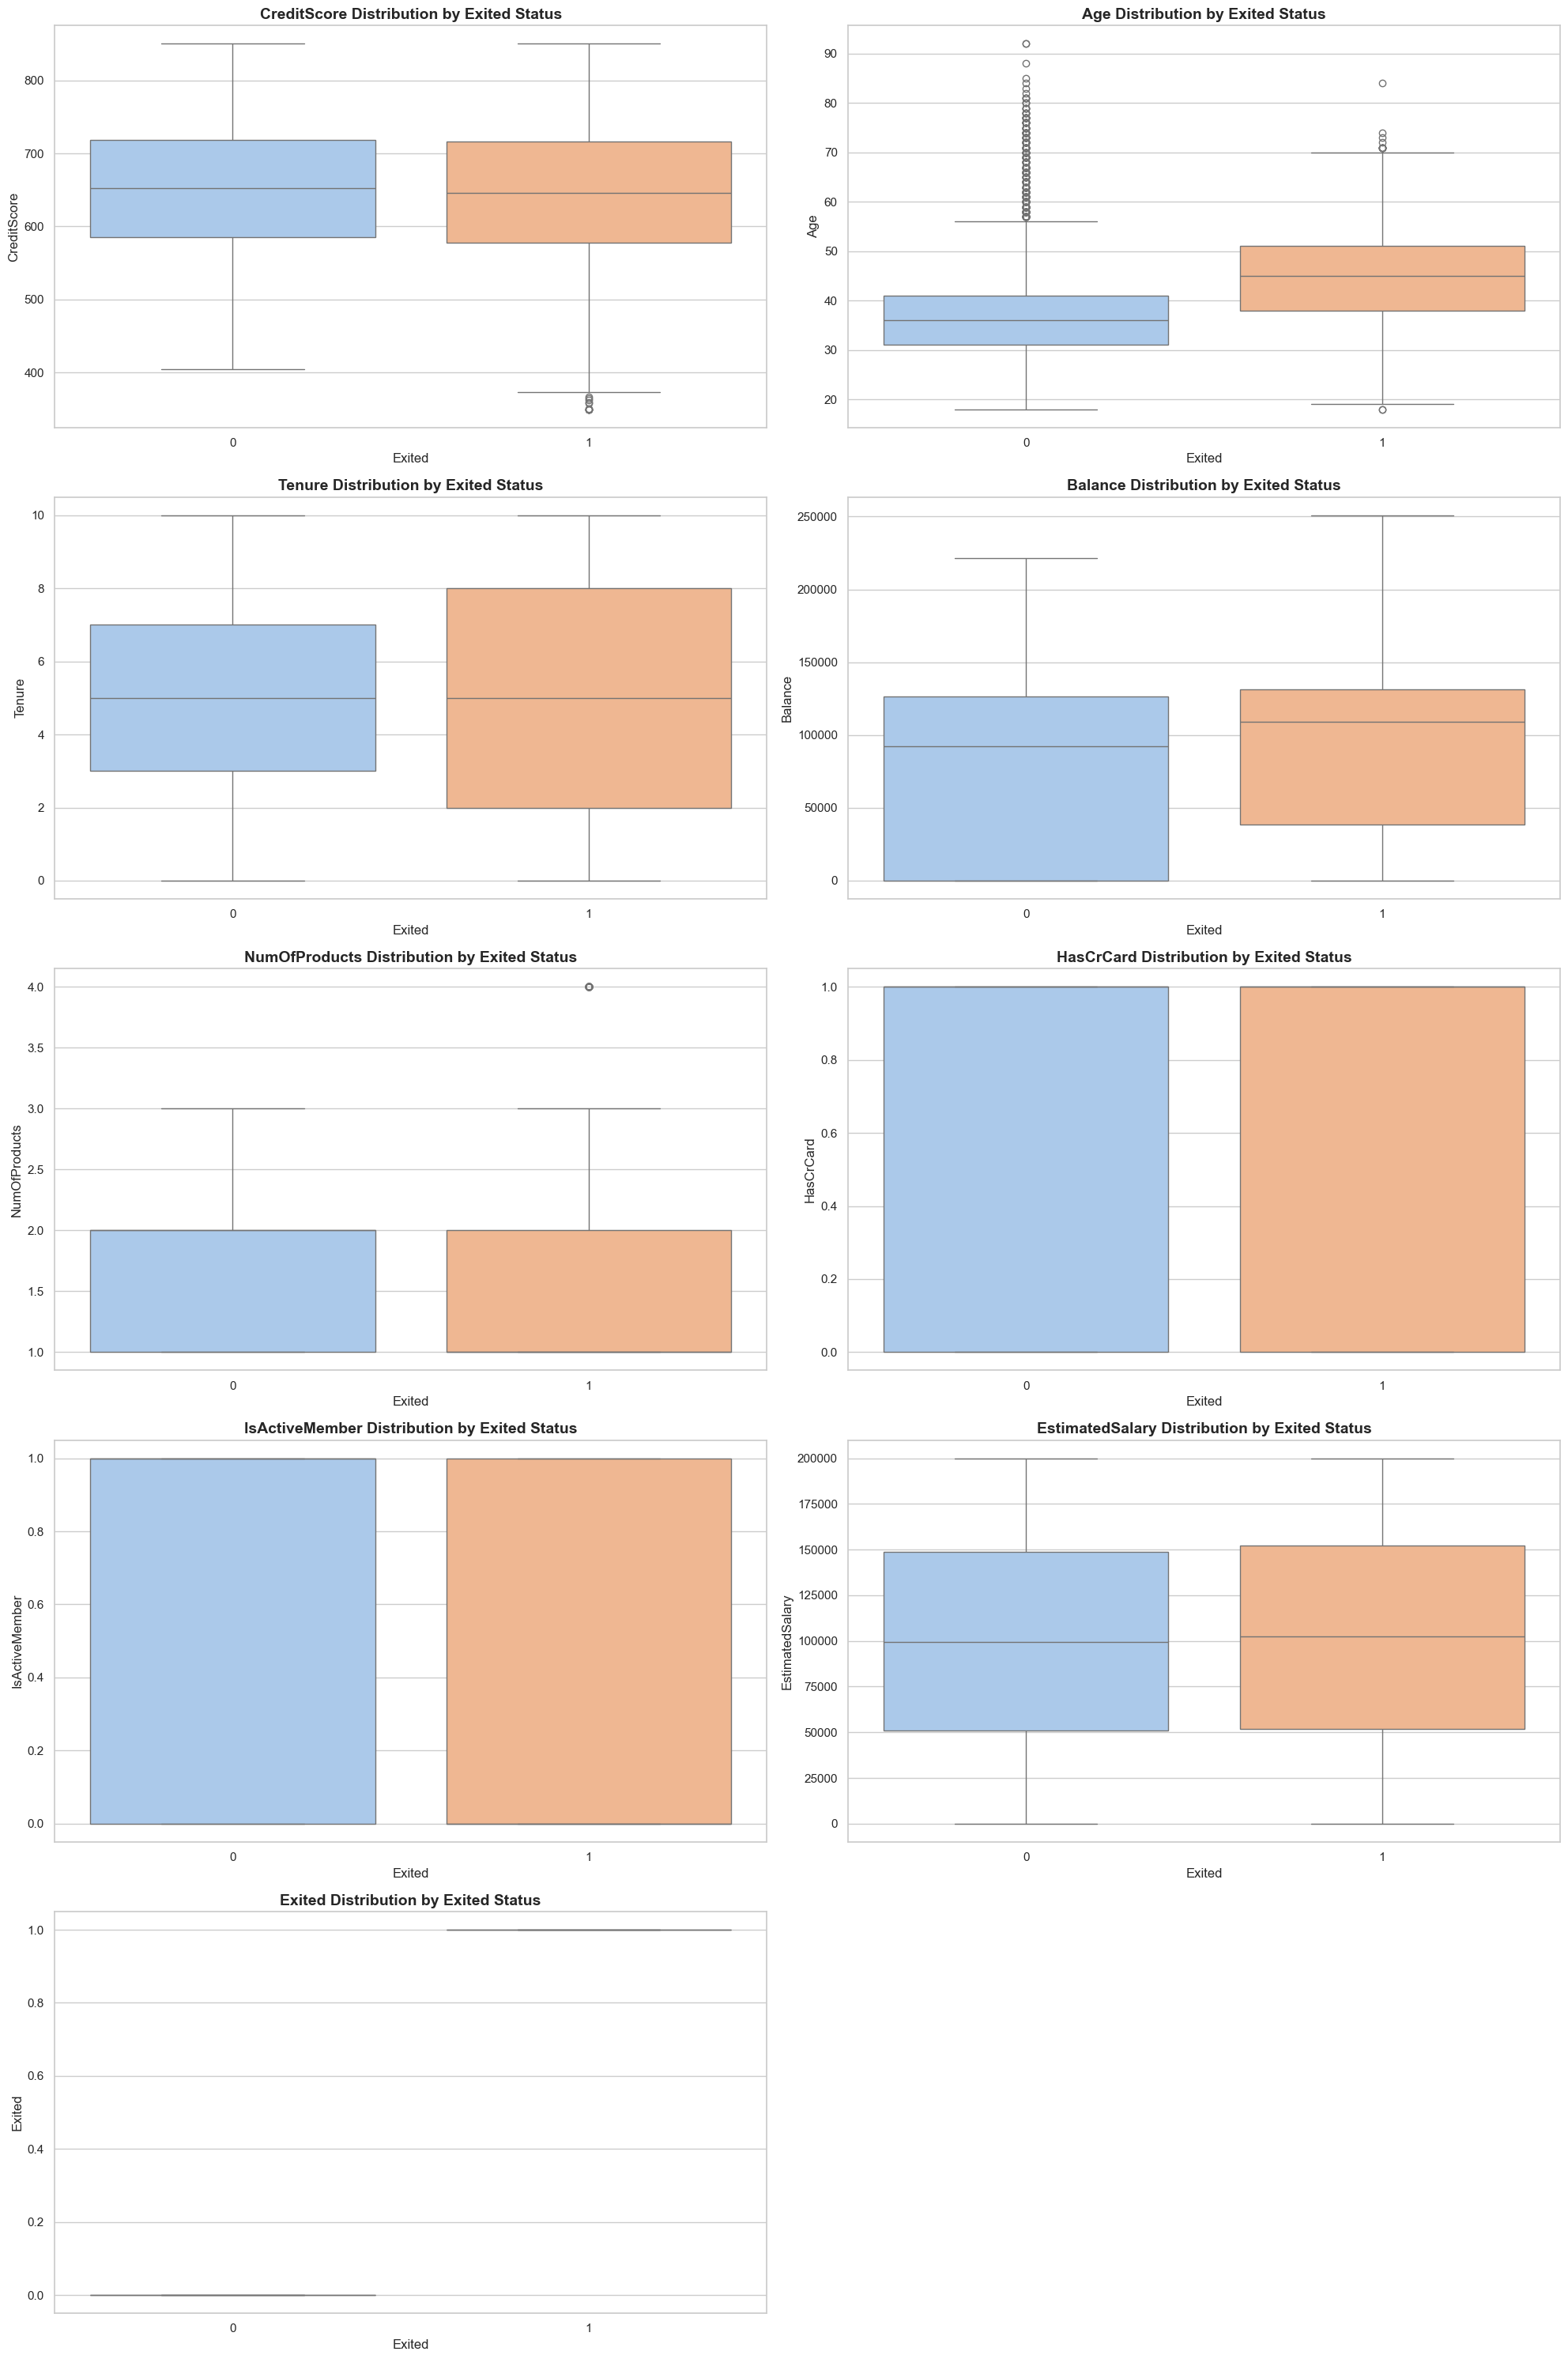

In [17]:
cat_df = df.select_dtypes(exclude=['number'])

plt.figure(figsize=(20, 30))
for i, col in enumerate(numeric_df.columns):
    plt.subplot(5, 2, i+1)
    sns.boxplot(x="Exited", y=df[col], data=df, palette="pastel")
    plt.title(f'{col} Distribution by Exited Status',fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


In [18]:
skew =numeric_df.skew().sort_values(ascending = False)
skew

Exited             1.471611
Age                1.011320
NumOfProducts      0.745568
Tenure             0.010991
EstimatedSalary    0.002085
IsActiveMember    -0.060437
CreditScore       -0.071607
Balance           -0.141109
HasCrCard         -0.901812
dtype: float64

In [19]:
kurt = numeric_df.kurtosis().sort_values(ascending = False)
kurt

Age                1.395347
NumOfProducts      0.582981
Exited             0.165671
CreditScore       -0.425726
Tenure            -1.165225
EstimatedSalary   -1.181518
HasCrCard         -1.186973
Balance           -1.489412
IsActiveMember    -1.996747
dtype: float64

# 3. Bivariate Analysis

In [20]:
numeric_df.columns.tolist()

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [21]:
remove_col = ['HasCrCard', 'IsActiveMember', 'Exited']
num_df = numeric_df.drop(columns=remove_col)
num_df.columns.tolist()

['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [22]:
cat_df = df.columns.difference(num_df.columns)
cat_df = df[cat_df]
cat_df.drop('Exited',axis = 1,inplace = True)
cat_df.columns.tolist()

['Gender', 'Geography', 'HasCrCard', 'IsActiveMember']

## Statistical hypothesis test

### Chie Square Test
### (For Categorical columns

In [23]:
for col in cat_df.columns:
    contingency = pd.crosstab(cat_df[col], df['Exited'])
    
    if contingency.shape[0] > 1 and contingency.shape[1] > 1:
        chi2, p, dof, expected = chi2_contingency(contingency)
        
        significance = "Yes" if p < 0.05 else "No"
        
        print(f"Column: {col}")
        print(f"  Test Statistic: {chi2:.4f}")
        print(f"  p-value       : {p:.4f}")
        print(f"  Statistically Significant?  {significance}\n")

Column: Gender
  Test Statistic: 112.9186
  p-value       : 0.0000
  Statistically Significant?  Yes

Column: Geography
  Test Statistic: 301.2553
  p-value       : 0.0000
  Statistically Significant?  Yes

Column: HasCrCard
  Test Statistic: 0.4713
  p-value       : 0.4924
  Statistically Significant?  No

Column: IsActiveMember
  Test Statistic: 242.9853
  p-value       : 0.0000
  Statistically Significant?  Yes



The features Gender, Geography, and IsActiveMember were found to be statistically significant (p < 0.05) based on the Chi-Square test of independence. This suggests that they have a meaningful association with the target variable and may play an important role in predicting outcomes.


**Statistically Significant Features (p < 0.05):**

- Gender
- Geography
- IsActiveMember

### ANOVA Test
### (For Numerical Columns)

In [24]:
for col in num_df.columns:

    group_0 = df[df['Exited'] == 0][col].dropna()
    group_1 = df[df['Exited'] == 1][col].dropna()
    
    f_stat, p = f_oneway(group_0, group_1)
    
    significance = "Yes" if p < 0.05 else "No"
    
    print(f"Column: {col}")
    print(f"  Test Statistic: {f_stat:.4f}")
    print(f"  p-value       : {p:.4f}")
    print(f"  Statistically Significant? {significance}\n")

Column: CreditScore
  Test Statistic: 7.3445
  p-value       : 0.0067
  Statistically Significant? Yes

Column: Age
  Test Statistic: 886.0633
  p-value       : 0.0000
  Statistically Significant? Yes

Column: Tenure
  Test Statistic: 1.9602
  p-value       : 0.1615
  Statistically Significant? No

Column: Balance
  Test Statistic: 142.4738
  p-value       : 0.0000
  Statistically Significant? Yes

Column: NumOfProducts
  Test Statistic: 22.9152
  p-value       : 0.0000
  Statistically Significant? Yes

Column: EstimatedSalary
  Test Statistic: 1.4633
  p-value       : 0.2264
  Statistically Significant? No



Based on the One-Way ANOVA test, the following numerical features were found to be statistically significant (p < 0.05) in relation to the target variable Exited. This indicates that the mean values of these features differ significantly between customers who exited and those who did not, making them potentially valuable for predictive modeling

**Statistically Significant Features (p < 0.05):**

- CreditScore
- Age
- Balance
- NumOfProducts

## Correlation Analysis

In [25]:
num_df["Exited"] = df["Exited"]

corr_matrix = num_df.corr()
corr_matrix

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.014204,-0.047820
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,0.012097,1.000000


In [26]:
top_corr = corr_matrix['Exited'].sort_values(ascending=False)
top_corr

Exited             1.000000
Age                0.285323
Balance            0.118533
EstimatedSalary    0.012097
Tenure            -0.014001
CreditScore       -0.027094
NumOfProducts     -0.047820
Name: Exited, dtype: float64

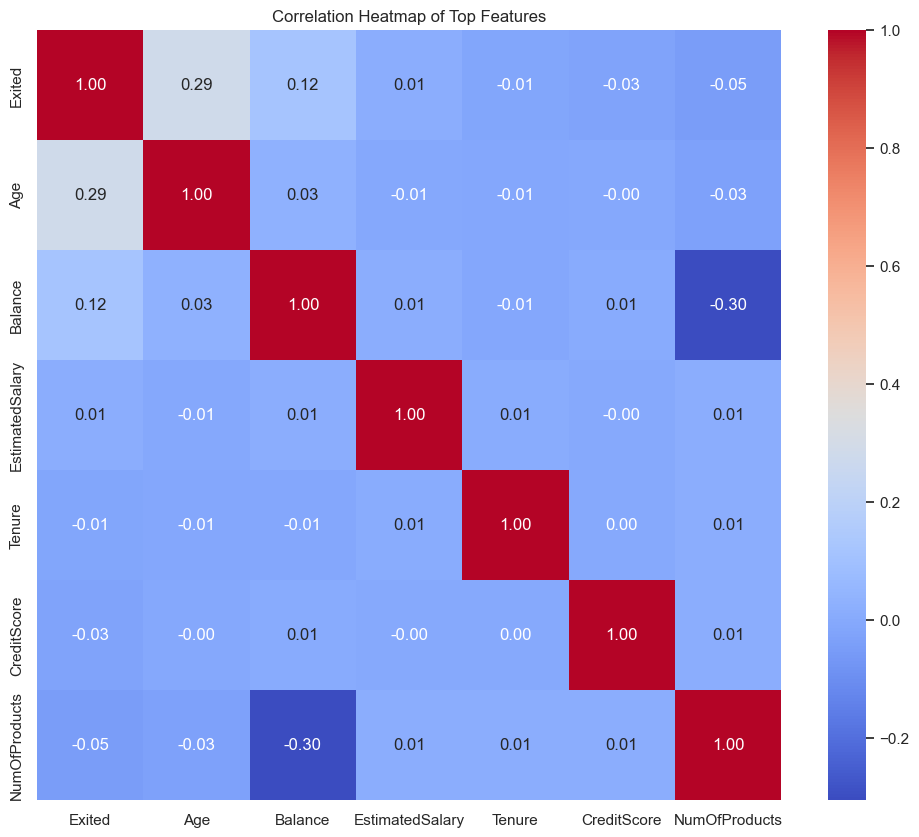

In [27]:
top_corr_features = top_corr.index.tolist()
plt.figure(figsize=(12, 10))
sns.heatmap(df[top_corr_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Top Features")
plt.show()


# 4. Data pre-processing

In [28]:
df.shape

(10000, 11)

## Handling Missing Values

In [29]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Handling Outliers

In [30]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
import pandas as pd

X1 = df.drop(columns=['Exited'])

X1 = pd.get_dummies(X1, drop_first=True)  

scaler = StandardScaler()
X_scaled1 = scaler.fit_transform(X1)

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.03)
y_pred = lof.fit_predict(X_scaled1)

df_cleaned = df[y_pred == 1]

print(f"Original shape: {df.shape}")
print(f"After removing outliers: {df_cleaned.shape}")

Original shape: (10000, 11)
After removing outliers: (9700, 11)


In [31]:
df_cleaned.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Feature Encoding

In [32]:
x = df_cleaned.drop(columns ='Exited')
y = df_cleaned['Exited']

In [33]:
x = pd.get_dummies(x, columns=['Gender', 'Geography'], drop_first=True).astype(int)
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,Geography_Germany,Geography_Spain
0,619,42,2,0,1,1,1,101348,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1
2,502,42,8,159660,3,1,0,113931,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1


In [34]:
y.value_counts()

Exited
0    7841
1    1859
Name: count, dtype: int64

In [35]:
y.value_counts(normalize = True)

Exited
0    0.808351
1    0.191649
Name: proportion, dtype: float64

# 5. ML Modeling

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Training Logistic Regression with difrrent sampleing based Approches

### Normal Model

In [38]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [39]:
y_pred0 = model.predict(X_test)
y_proba0 = model.predict_proba(X_test)[:,1]

In [40]:
from sklearn.metrics import (
    accuracy_score, confusion_matrix, precision_score, recall_score, 
    f1_score, roc_auc_score, roc_curve
)
import numpy as np

def evaluate_classification(y_true, y_pred, y_pred_proba=None):
    """
    Reusable classification performance evaluation function.
    
    Parameters:
    y_true (array-like): True labels
    y_pred (array-like): Predicted labels
    y_pred_proba (array-like, optional): Predicted probabilities for positive class (needed for AUC)
    """
    
    # Accuracy
    accuracy = accuracy_score(y_true, y_pred)
    
    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    TN, FP, FN, TP = cm.ravel()
    
    # Precision, Recall, F1
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)  # TPR (Sensitivity)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    
    # AUC
    auc = None
    if y_pred_proba is not None:
        auc = roc_auc_score(y_true, y_pred_proba)
    
    # Derived metrics
    TPR = recall  # True Positive Rate
    TNR = TN / (TN + FP) if (TN + FP) != 0 else 0  # True Negative Rate (Specificity)
    FPR = FP / (FP + TN) if (FP + TN) != 0 else 0  # False Positive Rate
    FNR = FN / (FN + TP) if (FN + TP) != 0 else 0  # False Negative Rate
    
    # Print results
    print("=== Classification Report ===")
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    if auc is not None:
        print(f"AUC:       {auc:.4f}")
    
    print("\n--- Confusion Matrix ---")
    print(cm)
    print(f"TP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}")
    
    print("\n--- Rates ---")
    print(f"TPR (Recall/Sensitivity): {TPR:.4f}")
    print(f"TNR (Specificity):        {TNR:.4f}")
    print(f"FPR:                      {FPR:.4f}")
    print(f"FNR:                      {FNR:.4f}")

    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "auc": auc,
        "TP": TP, "TN": TN, "FP": FP, "FN": FN,
        "TPR": TPR, "TNR": TNR, "FPR": FPR, "FNR": FNR
    }


In [41]:
result0 = evaluate_classification(y_test, y_pred0, y_pred_proba=y_proba0)

=== Classification Report ===
Accuracy:  0.7149
Precision: 0.3679
Recall:    0.6774
F1 Score:  0.4768
AUC:       0.7837

--- Confusion Matrix ---
[[1135  433]
 [ 120  252]]
TP: 252, TN: 1135, FP: 433, FN: 120

--- Rates ---
TPR (Recall/Sensitivity): 0.6774
TNR (Specificity):        0.7239
FPR:                      0.2761
FNR:                      0.3226


### 1) Upsampling Minority Class

In [42]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

X_train_res1, y_train_res1 = ros.fit_resample(X_train, y_train)

print("Before Upsampling:", y_train.value_counts())
print("After Upsampling:", y_train_res1.value_counts())

Before Upsampling: Exited
0    6273
1    1487
Name: count, dtype: int64
After Upsampling: Exited
0    6273
1    6273
Name: count, dtype: int64


In [43]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train_res1, y_train_res1)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [44]:
y_pred1 = model.predict(X_test)
y_proba1 = model.predict_proba(X_test)[:,1]

In [45]:
result1 = evaluate_classification(y_test, y_pred1, y_pred_proba=y_proba1)

=== Classification Report ===
Accuracy:  0.7160
Precision: 0.3701
Recall:    0.6855
F1 Score:  0.4807
AUC:       0.7835

--- Confusion Matrix ---
[[1134  434]
 [ 117  255]]
TP: 255, TN: 1134, FP: 434, FN: 117

--- Rates ---
TPR (Recall/Sensitivity): 0.6855
TNR (Specificity):        0.7232
FPR:                      0.2768
FNR:                      0.3145


### 2) Downsampling Majority Class

In [46]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)

X_train_res2, y_train_res2 = rus.fit_resample(X_train, y_train)

print("Before Downsampling:", y_train.value_counts())
print("After Downsampling:", y_train_res2.value_counts())

Before Downsampling: Exited
0    6273
1    1487
Name: count, dtype: int64
After Downsampling: Exited
0    1487
1    1487
Name: count, dtype: int64


In [47]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression(class_weight='balanced', max_iter=1000)
model2.fit(X_train_res2, y_train_res2)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [48]:
y_pred2 = model2.predict(X_test)
y_proba2 = model2.predict_proba(X_test)[:,1]
result2 = evaluate_classification(y_test, y_pred2, y_pred_proba=y_proba2)

=== Classification Report ===
Accuracy:  0.7186
Precision: 0.3754
Recall:    0.7043
F1 Score:  0.4897
AUC:       0.7843

--- Confusion Matrix ---
[[1132  436]
 [ 110  262]]
TP: 262, TN: 1132, FP: 436, FN: 110

--- Rates ---
TPR (Recall/Sensitivity): 0.7043
TNR (Specificity):        0.7219
FPR:                      0.2781
FNR:                      0.2957


### 3 ) Cluster Centroids

In [49]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(random_state=42)

X_train_res3, y_train_res3 = cc.fit_resample(X_train, y_train)

print("Before undersampling:", y_train.value_counts())
print("After undersampling:", y_train_res3.value_counts())

Before undersampling: Exited
0    6273
1    1487
Name: count, dtype: int64
After undersampling: Exited
0    1487
1    1487
Name: count, dtype: int64


In [50]:
from sklearn.linear_model import LogisticRegression
model3 = LogisticRegression( max_iter=1000)
model3.fit(X_train_res3, y_train_res3)

LogisticRegression(max_iter=1000)

In [51]:
y_pred3 = model3.predict(X_test)
y_proba3 = model3.predict_proba(X_test)[:,1]
result3 = evaluate_classification(y_test, y_pred3, y_pred_proba=y_proba3)

=== Classification Report ===
Accuracy:  0.7119
Precision: 0.3598
Recall:    0.6452
F1 Score:  0.4620
AUC:       0.7688

--- Confusion Matrix ---
[[1141  427]
 [ 132  240]]
TP: 240, TN: 1141, FP: 427, FN: 132

--- Rates ---
TPR (Recall/Sensitivity): 0.6452
TNR (Specificity):        0.7277
FPR:                      0.2723
FNR:                      0.3548


### 4 ) SMOTE

In [52]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_res4, y_train_res4 = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res4.value_counts())

Before SMOTE: Exited
0    6273
1    1487
Name: count, dtype: int64
After SMOTE: Exited
0    6273
1    6273
Name: count, dtype: int64


In [53]:
from sklearn.linear_model import LogisticRegression
model4 = LogisticRegression( max_iter=1000)
model4.fit(X_train_res4, y_train_res4)

LogisticRegression(max_iter=1000)

In [54]:
y_pred4 = model4.predict(X_test)
y_proba4 = model4.predict_proba(X_test)[:,1]
result4 = evaluate_classification(y_test, y_pred4, y_pred_proba=y_proba4)

=== Classification Report ===
Accuracy:  0.7216
Precision: 0.3761
Recall:    0.6855
F1 Score:  0.4857
AUC:       0.7841

--- Confusion Matrix ---
[[1145  423]
 [ 117  255]]
TP: 255, TN: 1145, FP: 423, FN: 117

--- Rates ---
TPR (Recall/Sensitivity): 0.6855
TNR (Specificity):        0.7302
FPR:                      0.2698
FNR:                      0.3145


### 5 ) ADASYN Algorithm

In [55]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state=42)

X_train_res5, y_train_res5 = adasyn.fit_resample(X_train, y_train)

print("Before ADASYN:", y_train.value_counts())
print("After ADASYN:", y_train_res5.value_counts())

Before ADASYN: Exited
0    6273
1    1487
Name: count, dtype: int64
After ADASYN: Exited
0    6273
1    5925
Name: count, dtype: int64


In [56]:
from sklearn.linear_model import LogisticRegression
model5 = LogisticRegression( max_iter=1000)
model5.fit(X_train_res5, y_train_res5)

LogisticRegression(max_iter=1000)

In [57]:
y_pred5 = model5.predict(X_test)
y_proba5 = model5.predict_proba(X_test)[:,1]
result5 = evaluate_classification(y_test, y_pred5, y_pred_proba=y_proba5)

=== Classification Report ===
Accuracy:  0.7206
Precision: 0.3799
Recall:    0.7231
F1 Score:  0.4981
AUC:       0.7855

--- Confusion Matrix ---
[[1129  439]
 [ 103  269]]
TP: 269, TN: 1129, FP: 439, FN: 103

--- Rates ---
TPR (Recall/Sensitivity): 0.7231
TNR (Specificity):        0.7200
FPR:                      0.2800
FNR:                      0.2769


### 6 ) Tomek Link

In [58]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(sampling_strategy="auto")

X_train_res6, y_train_res6 = tl.fit_resample(X_train, y_train)

print("Before Tomek Links:", y_train.value_counts())
print("After Tomek Links:", y_train_res6.value_counts())

Before Tomek Links: Exited
0    6273
1    1487
Name: count, dtype: int64
After Tomek Links: Exited
0    5884
1    1487
Name: count, dtype: int64


In [59]:
from sklearn.linear_model import LogisticRegression
model6 = LogisticRegression( max_iter=1000)
model6.fit(X_train_res6, y_train_res6)

LogisticRegression(max_iter=1000)

In [60]:
y_pred6 = model6.predict(X_test)
y_proba6 = model6.predict_proba(X_test)[:,1]
result6 = evaluate_classification(y_test, y_pred6, y_pred_proba=y_proba6)

=== Classification Report ===
Accuracy:  0.8232
Precision: 0.5819
Recall:    0.2769
F1 Score:  0.3752
AUC:       0.7822

--- Confusion Matrix ---
[[1494   74]
 [ 269  103]]
TP: 103, TN: 1494, FP: 74, FN: 269

--- Rates ---
TPR (Recall/Sensitivity): 0.2769
TNR (Specificity):        0.9528
FPR:                      0.0472
FNR:                      0.7231


### 7 ) Near Miss

#### near miss 1

In [61]:
from imblearn.under_sampling import NearMiss

nm = NearMiss(version=1)

X_train_res7, y_train_res7 = nm.fit_resample(X_train, y_train)

print("Before NearMiss:", y_train.value_counts())
print("After NearMiss:", y_train_res7.value_counts())

Before NearMiss: Exited
0    6273
1    1487
Name: count, dtype: int64
After NearMiss: Exited
0    1487
1    1487
Name: count, dtype: int64


In [62]:
from sklearn.linear_model import LogisticRegression
model7 = LogisticRegression( max_iter=1000)
model7.fit(X_train_res7, y_train_res7)

LogisticRegression(max_iter=1000)

In [63]:
y_pred7 = model7.predict(X_test)
y_proba7 = model7.predict_proba(X_test)[:,1]
result7 = evaluate_classification(y_test, y_pred7, y_pred_proba=y_proba7)

=== Classification Report ===
Accuracy:  0.6170
Precision: 0.2855
Recall:    0.6640
F1 Score:  0.3994
AUC:       0.6828

--- Confusion Matrix ---
[[950 618]
 [125 247]]
TP: 247, TN: 950, FP: 618, FN: 125

--- Rates ---
TPR (Recall/Sensitivity): 0.6640
TNR (Specificity):        0.6059
FPR:                      0.3941
FNR:                      0.3360


#### near miss 2

In [64]:
from imblearn.under_sampling import NearMiss

nm2 = NearMiss(version=2)

X_train_res72, y_train_res72 = nm2.fit_resample(X_train, y_train)

print("Before NearMiss:", y_train.value_counts())
print("After NearMiss:", y_train_res72.value_counts())

from sklearn.linear_model import LogisticRegression
model72 = LogisticRegression( max_iter=1000)
model72.fit(X_train_res72, y_train_res72)

y_pred72 = model72.predict(X_test)
y_proba72 = model7.predict_proba(X_test)[:,1]
result72 = evaluate_classification(y_test, y_pred72, y_pred_proba=y_proba72)

Before NearMiss: Exited
0    6273
1    1487
Name: count, dtype: int64
After NearMiss: Exited
0    1487
1    1487
Name: count, dtype: int64
=== Classification Report ===
Accuracy:  0.5727
Precision: 0.2870
Recall:    0.8280
F1 Score:  0.4263
AUC:       0.6828

--- Confusion Matrix ---
[[803 765]
 [ 64 308]]
TP: 308, TN: 803, FP: 765, FN: 64

--- Rates ---
TPR (Recall/Sensitivity): 0.8280
TNR (Specificity):        0.5121
FPR:                      0.4879
FNR:                      0.1720


#### near miss 3

In [65]:
from imblearn.under_sampling import NearMiss

nm3 = NearMiss(version=3)

X_train_res73, y_train_res73 = nm3.fit_resample(X_train, y_train)

print("Before NearMiss:", y_train.value_counts())
print("After NearMiss:", y_train_res73.value_counts())

from sklearn.linear_model import LogisticRegression
model73 = LogisticRegression( max_iter=1000)
model73.fit(X_train_res73, y_train_res73)

y_pred73 = model72.predict(X_test)
y_proba73 = model7.predict_proba(X_test)[:,1]
result73 = evaluate_classification(y_test, y_pred73, y_pred_proba=y_proba73)

Before NearMiss: Exited
0    6273
1    1487
Name: count, dtype: int64
After NearMiss: Exited
0    1487
1    1487
Name: count, dtype: int64
=== Classification Report ===
Accuracy:  0.5727
Precision: 0.2870
Recall:    0.8280
F1 Score:  0.4263
AUC:       0.6828

--- Confusion Matrix ---
[[803 765]
 [ 64 308]]
TP: 308, TN: 803, FP: 765, FN: 64

--- Rates ---
TPR (Recall/Sensitivity): 0.8280
TNR (Specificity):        0.5121
FPR:                      0.4879
FNR:                      0.1720


In [66]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks, NearMiss

sm = SMOTE(sampling_strategy="auto", random_state=42)
X_sm, y_sm = sm.fit_resample(X_train, y_train)

print("After SMOTE:", y_sm.value_counts())

tl = TomekLinks(sampling_strategy="auto")
X_tl, y_tl = tl.fit_resample(X_sm, y_sm)

print("After TomekLinks:", y_tl.value_counts())

nm = NearMiss(version=1, sampling_strategy="auto")
X_res, y_res = nm.fit_resample(X_tl, y_tl)

print("After NearMiss:", y_res.value_counts())

After SMOTE: Exited
0    6273
1    6273
Name: count, dtype: int64
After TomekLinks: Exited
0    6273
1    6172
Name: count, dtype: int64
After NearMiss: Exited
0    6172
1    6172
Name: count, dtype: int64


In [67]:
from sklearn.linear_model import LogisticRegression
model8 = LogisticRegression( max_iter=1000)
model8.fit(X_res, y_res)

y_pred8 = model8.predict(X_test)
y_proba8 = model8.predict_proba(X_test)[:,1]
result8 = evaluate_classification(y_test, y_pred8, y_pred_proba=y_proba8)

=== Classification Report ===
Accuracy:  0.7232
Precision: 0.3770
Recall:    0.6801
F1 Score:  0.4851
AUC:       0.7841

--- Confusion Matrix ---
[[1150  418]
 [ 119  253]]
TP: 253, TN: 1150, FP: 418, FN: 119

--- Rates ---
TPR (Recall/Sensitivity): 0.6801
TNR (Specificity):        0.7334
FPR:                      0.2666
FNR:                      0.3199


## 2. KNN Algorithm

In [68]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5) 

knn.fit(X_train, y_train)

y_pred_train = knn.predict(X_test)

result001 = evaluate_classification(y_test, y_pred_train)

=== Classification Report ===
Accuracy:  0.8340
Precision: 0.6157
Recall:    0.3575
F1 Score:  0.4524

--- Confusion Matrix ---
[[1485   83]
 [ 239  133]]
TP: 133, TN: 1485, FP: 83, FN: 239

--- Rates ---
TPR (Recall/Sensitivity): 0.3575
TNR (Specificity):        0.9471
FPR:                      0.0529
FNR:                      0.6425


In [70]:
from sklearn.neighbors import KNeighborsClassifier

knn1 = KNeighborsClassifier(n_neighbors=5)  

knn1.fit(X_train_res6, y_train_res6)

y_pred_test1 = knn1.predict(X_test)

result002 = evaluate_classification(y_test, y_pred_test1)

=== Classification Report ===
Accuracy:  0.8314
Precision: 0.5856
Recall:    0.4140
F1 Score:  0.4850

--- Confusion Matrix ---
[[1459  109]
 [ 218  154]]
TP: 154, TN: 1459, FP: 109, FN: 218

--- Rates ---
TPR (Recall/Sensitivity): 0.4140
TNR (Specificity):        0.9305
FPR:                      0.0695
FNR:                      0.5860


## 3 . Dicision Tree Algorithm

In [71]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42) 

dt_model.fit(X_train, y_train)

y_pred_test2 = dt_model.predict(X_test)

result02 = evaluate_classification(y_test, y_pred_test2)

=== Classification Report ===
Accuracy:  0.7943
Precision: 0.4662
Recall:    0.5000
F1 Score:  0.4825

--- Confusion Matrix ---
[[1355  213]
 [ 186  186]]
TP: 186, TN: 1355, FP: 213, FN: 186

--- Rates ---
TPR (Recall/Sensitivity): 0.5000
TNR (Specificity):        0.8642
FPR:                      0.1358
FNR:                      0.5000


## 4. SVM Algorithm

In [72]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', random_state=42)  

svm_model.fit(X_train, y_train)

y_pred_test03 = svm_model.predict(X_test)

result03 = evaluate_classification(y_test, y_pred_test03)

=== Classification Report ===
Accuracy:  0.8541
Precision: 0.7697
Recall:    0.3414
F1 Score:  0.4730

--- Confusion Matrix ---
[[1530   38]
 [ 245  127]]
TP: 127, TN: 1530, FP: 38, FN: 245

--- Rates ---
TPR (Recall/Sensitivity): 0.3414
TNR (Specificity):        0.9758
FPR:                      0.0242
FNR:                      0.6586


In [73]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', random_state=42)  
svm_model.fit(X_train_res6, y_train_res6)

y_pred_test003 = svm_model.predict(X_test)

result003 = evaluate_classification(y_test, y_pred_test003)

=== Classification Report ===
Accuracy:  0.8577
Precision: 0.7202
Recall:    0.4220
F1 Score:  0.5322

--- Confusion Matrix ---
[[1507   61]
 [ 215  157]]
TP: 157, TN: 1507, FP: 61, FN: 215

--- Rates ---
TPR (Recall/Sensitivity): 0.4220
TNR (Specificity):        0.9611
FPR:                      0.0389
FNR:                      0.5780


In [74]:
!pip freeze > requirements.txt